In [ ]:
#ask about duplicates vs rejects


In [3]:
import warnings
warnings.filterwarnings('ignore')

import json
import numpy as np
import pandas as pd
import os
import requests
import sys

import atomsci.ddm.pipeline.model_pipeline as mp
import atomsci.ddm.pipeline.parameter_parser as parse
import atomsci.ddm.utils.curate_data as curate_data
import atomsci.ddm.utils.struct_utils as struct_utils
from atomsci.ddm.pipeline import perf_plots as pp


In [4]:
import deepchem as dc

# get the Install AMPL_GPU_test.sh
!wget https://raw.githubusercontent.com/ravichas/AMPL-Tutorial/master/config/install_AMPL_GPU_test.sh

# run the script to install AMPL
! chmod u+x install_AMPL_GPU_test.sh
! ./install_AMPL_GPU_test.sh

--2023-06-14 18:22:06--  https://raw.githubusercontent.com/ravichas/AMPL-Tutorial/master/config/install_AMPL_GPU_test.sh
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1127 (1.1K) [text/plain]
Saving to: ‘install_AMPL_GPU_test.sh.1’

install_AMPL_GPU_te 100%[===================>]   1.10K  --.-KB/s    in 0s      

2023-06-14 18:22:06 (76.8 MB/s) - ‘install_AMPL_GPU_test.sh.1’ saved [1127/1127]

mkdir: cannot create directory ‘github’: File exists
fatal: destination path 'AMPL' already exists and is not an empty directory.
error: pathspec 'deepchem_25' did not match any file(s) known to git
patch: **** Can't create temporary file /content/github/AMPL/atomsci/ddm/pipeline/transformations.py.oma73Aj : No such file or directory
patch: **** Can't create temporary

In [5]:
import atomsci.ddm.utils.data_curation_functions as dcf
import atomsci.ddm.utils.curate_data as curate_data
import atomsci.ddm.pipeline.diversity_plots as dp
import atomsci.ddm.pipeline.chem_diversity as cd

In [6]:
target_name='QM9_Dataset'
ofile=target_name+'_excape_curated.csv'

In [7]:
import io
url = 'https://deepchemdata.s3-us-west-1.amazonaws.com/datasets/qm9.csv'

download = requests.get(url).content

In [8]:
# Reading the downloaded content and turning it into a pandas dataframe
data = pd.read_csv(io.StringIO(download.decode('utf-8')), sep=',', header=0 )

In [9]:
data.head()

mol_id smiles          A           B           C      mu  alpha    homo  \
0  gdb_1      C  157.71180  157.709970  157.706990  0.0000  13.21 -0.3877   
1  gdb_2      N  293.60975  293.541110  191.393970  1.6256   9.46 -0.2570   
2  gdb_3      O  799.58812  437.903860  282.945450  1.8511   6.31 -0.2928   
3  gdb_4    C#C    0.00000   35.610036   35.610036  0.0000  16.28 -0.2845   
4  gdb_5    C#N    0.00000   44.593883   44.593883  2.8937  12.99 -0.3604   

     lumo     gap  ...      zpve         u0       u298       h298       g298  \
0  0.1171  0.5048  ...  0.044749 -40.478930 -40.476062 -40.475117 -40.498597   
1  0.0829  0.3399  ...  0.034358 -56.525887 -56.523026 -56.522082 -56.544961   
2  0.0687  0.3615  ...  0.021375 -76.404702 -76.401867 -76.400922 -76.422349   
3  0.0506  0.3351  ...  0.026841 -77.308427 -77.305527 -77.304583 -77.327429   
4  0.0191  0.3796  ...  0.016601 -93.411888 -93.409370 -93.408425 -93.431246   

      cv     u0_atom   u298_atom   h298_atom   g298_atom  
0  6.469 -395.999595 -398.643290 -401.014647 -372.471772  
1  6.316 -276.861363 -278.620271 -280.399259 -259.338802  
2  6.002 -213.087624 -213.974294 -215.159658 -201.407171  
3  8.574 -385.501997 -387.237686 -389.016047 -365.800724  
4  6.278 -301.820534 -302.906752 -304.091489 -288.720028  

[5 rows x 21 columns]

In [10]:
curated_file=ofile

In [11]:
data['smiles']

0                           C
1                           N
2                           O
3                         C#C
4                         C#N
                 ...         
133880    C1C2C3C4C5OC14C5N23
133881    C1N2C3C2C2C4OC12C34
133882    C1N2C3C4C5C2C13CN45
133883    C1N2C3C4C5CC13C2C45
133884    C1N2C3C4C5OC13C2C45
Name: smiles, Length: 133885, dtype: object

In [12]:
# Generate SMILES, InChI keys for dataset with curation and structure modules.
# RDkit modules are used to process the SMILES strings

data['rdkit_smiles'] = data['smiles'].apply(curate_data.base_smiles_from_smiles)
data['inchi_key'] = data['smiles'].apply(struct_utils.smiles_to_inchi_key)

[18:25:03] Can't kekulize mol.  Unkekulized atoms: 2 6
[18:25:03] Can't kekulize mol.  Unkekulized atoms: 3 5
[18:25:04] Can't kekulize mol.  Unkekulized atoms: 3 7
[18:27:47] WARNING: Omitted undefined stereo

[18:27:47] WARNING: Omitted undefined stereo

[18:27:47] WARNING: Omitted undefined stereo

[18:27:47] WARNING: Omitted undefined stereo

[18:27:47] WARNING: Omitted undefined stereo

[18:27:47] WARNING: Omitted undefined stereo

[18:27:47] WARNING: Proton(s) added/removed

[18:27:47] WARNING: Omitted undefined stereo

[18:27:47] WARNING: Omitted undefined stereo

[18:27:47] WARNING: Omitted undefined stereo

[18:27:47] WARNING: Omitted undefined stereo

[18:27:47] WARNING: Omitted undefined stereo

[18:27:47] WARNING: Omitted undefined stereo

[18:27:47] WARNING: Omitted undefined stereo

[18:27:47] WARNING: Omitted undefined stereo

[18:27:47] WARNING: Omitted undefined stereo

[18:27:47] WARNING: Omitted undefined stereo

[18:27:47] WARNING: Omitted undefined stereo

[18:27:4

In [13]:
print(data.shape)
print(data['rdkit_smiles'].value_counts()[0:10])

(133885, 23)
COCc1cnccn1         2
Nc1ncc(O)c(N)n1     2
Nc1ncc(F)c(N)n1     2
Cc1cnc(CO)cn1       2
CNC(N)=C(C=O)N=O    2
CNC(N)=C(CO)N=O     2
O=Cc1cnc(O)cn1      2
OCc1cnccn1          2
N=c1nc(N)nc(N)o1    2
O=COc1cnccn1        2
Name: rdkit_smiles, dtype: int64


In [14]:
# column: Response values column
column = 'gap'

# tolerance: Percentage of individual respsonse values allowed to different from 
# the average to be included in averaging
tolerance = 10

# list_bad_duplicates: Print structures with bad duplicates
list_bad_duplicates = 'Yes'

# max_std: Maximum allowed standard deviation for computed average response value
# NOTE: In this example, we set this value very high to disable this feature
max_std = 1

# compound_id: Compound ID column
compound_id = 'mol_id'

# smiles_col: SMILES column
smiles_col = 'rdkit_smiles'

# column that will be averaged ; smiles_col; used to find the replicates
# 

curated_df = curate_data.average_and_remove_duplicates(column, tolerance, 
                                                       list_bad_duplicates, 
                                                       data, max_std, 
                                                       compound_id=compound_id, 
                                                       smiles_col=smiles_col)
# curated_file = os.path.join(working_dir, ofile)
## discard out of range values
curated_df=curated_df[curated_df['VALUE_NUM_mean']>-1]
curated_df.to_csv(curated_file, index=False)

Bad duplicates removed from dataset
Dataframe size (133885, 27)
List of 'bad' duplicates removed
Empty DataFrame
Columns: [mol_id, gap, VALUE_NUM_mean, Perc_Var, VALUE_NUM_std]
Index: []

Dataset de-duplicated
Dataframe size (133787, 27)
New column created with averaged values:  VALUE_NUM_mean


In [15]:
curated_df['Remove_BadDuplicate'].value_counts()

0    133787
Name: Remove_BadDuplicate, dtype: int64

In [16]:
compound_id='rdkit_smiles'
reject=data[~data[compound_id].isin(curated_df[compound_id])]
reject

Empty DataFrame
Columns: [mol_id, smiles, A, B, C, mu, alpha, homo, lumo, gap, r2, zpve, u0, u298, h298, g298, cv, u0_atom, u298_atom, h298_atom, g298_atom, rdkit_smiles, inchi_key]
Index: []

[0 rows x 23 columns]

In [17]:
print("Number of discarded compounds",reject[compound_id].nunique())

ofile=target_name+'.reject_check.csv'
reject.to_csv(ofile,index=False)

Number of discarded compounds 0


(0.0, 12.0)

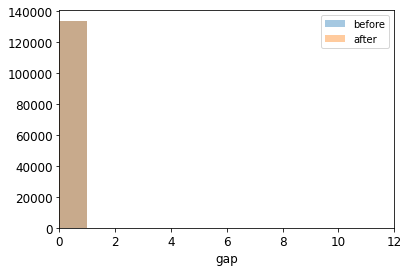

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, ax = plt.subplots()

# This will be our before curation
before=data["gap"]

# current curated dataframe will not include any out of range values
after=curated_df["gap"]

sns.distplot(before, bins=range(0, 12, 1), ax=ax, kde=False, label='before')
sns.distplot(after, bins=range(0, 12, 1), ax=ax, kde=False, label='after')
plt.legend()
ax.set_xlim([0, 12])

Post-processing dataset

Total Number of results = 133787
dataset mean = 0.2511461786272209 eV
dataset stdev = 0.04750427052110095 eV
dataset max = 0.6221 eV
dataset min = 0.0246 eV



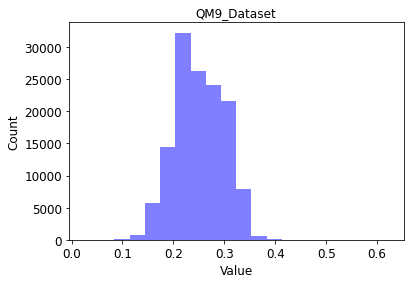

In [19]:
column = 'gap'
num_bins = 20
title = target_name
units = 'eV'
filepath = ""
data=curated_df

curate_data.summarize_data(column, num_bins, title, units, filepath, data)

In [21]:
curated_df.describe()

A              B              C             mu  \
count  133787.000000  133787.000000  133787.000000  133787.000000   
mean        9.818305       1.406110       1.124999       2.705849   
std      1810.128267       1.584327       1.095997       1.530056   
min         0.000000       0.337120       0.331180       0.000000   
25%         2.554315       1.091770       0.910565       1.588800   
50%         3.089930       1.370030       1.078740       2.500000   
75%         3.834485       1.653955       1.279650       3.635850   
max    619867.683140     437.903860     282.945450      29.556400   

               alpha           homo           lumo            gap  \
count  133787.000000  133787.000000  133787.000000  133787.000000   
mean       75.193020      -0.239980       0.011166       0.251146   
std         8.187356       0.022131       0.046923       0.047504   
min         6.310000      -0.428600      -0.175000       0.024600   
25%        70.380000      -0.252500      -0.023800       0.216300   
50%        75.500000      -0.241000       0.012000       0.249500   
75%        80.520000      -0.228700       0.049200       0.288300   
max       196.620000      -0.101700       0.193500       0.622100   

                  r2           zpve  ...           g298             cv  \
count  133787.000000  133787.000000  ...  133787.000000  133787.000000   
mean     1189.570420       0.148553  ...    -411.566971      31.603489   
std       279.806101       0.033263  ...      40.055609       4.061754   
min        19.000200       0.015951  ...    -714.602138       6.002000   
25%      1018.322250       0.125310  ...    -437.946784      28.945000   
50%      1147.576600       0.148343  ...    -417.893187      31.557000   
75%      1308.900300       0.171159  ...    -387.083198      34.278500   
max      3374.753200       0.273944  ...     -40.498597      46.969000   

             u0_atom      u298_atom      h298_atom      g298_atom  \
count  133787.000000  133787.000000  133787.000000  133787.000000   
mean    -1751.001287   -1761.670793   -1771.738610   -1629.559894   
std       239.248664     241.370780     243.085162     220.148249   
min     -2608.448864   -2626.408172   -2643.007040   -2417.121997   
25%     -1904.867575   -1917.141024   -1928.278367   -1771.471085   
50%     -1753.626611   -1764.303677   -1774.369549   -1632.435171   
75%     -1597.101080   -1606.328600   -1615.215382   -1488.483978   
max      -213.087624    -213.974294    -215.159658    -201.407171   

       VALUE_NUM_mean  VALUE_NUM_std      Perc_Var  Remove_BadDuplicate  
count   133787.000000      98.000000  1.337870e+05             133787.0  
mean         0.251146       0.000002  5.986427e-07                  0.0  
std          0.047504       0.000012  1.265968e-04                  0.0  
min          0.024600       0.000000  0.000000e+00                  0.0  
25%          0.216300       0.000000  0.000000e+00                  0.0  
50%          0.249500       0.000000  0.000000e+00                  0.0  
75%          0.288300       0.000000  0.000000e+00                  0.0  
max          0.622100       0.000071  2.846570e-02                  0.0  

[8 rows x 23 columns]